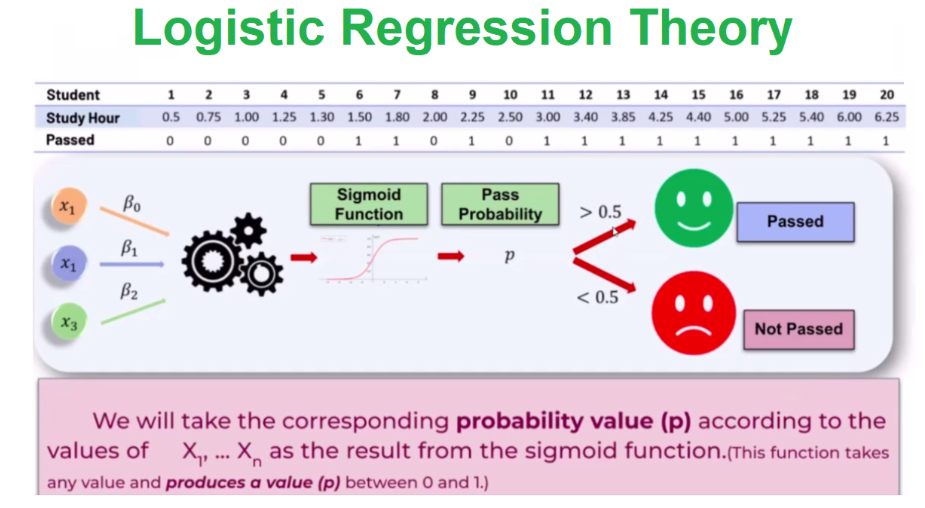

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\DataScience\Techpro\ML\datalar\hearing_test.csv")
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [3]:
df.shape

(5000, 3)

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

``classification modellerinde datanın balance durumu önemlidir. Balance yada unbalance durumuna göre bakılacak skorlar değişir.`` 

* Sınıflandırma problemlerinde sınıf dengesizliği (class imbalance) söz konusu olduğunda, doğruluk (accuracy) metriği yalnız başına yeterli olmayabilir. Bu durumda, f1 skoru, hassasiyet (precision) ve geri çağırma (recall) metriklerine de bakmak önemlidir.

* Doğruluk metriği, sınıf dağılımı dengeli olduğunda yararlı bir ölçüttür. Ancak, sınıflar arasındaki dengesizlik arttıkça, doğruluk metriği yanıltıcı olabilir. Örneğin, sınıf dağılımı %90-%10 olan bir veri setinde, doğruluk yüksek olabilir, ancak azınlık sınıfındaki örnekleri doğru sınıflandırmak önemlidir.

* F1 skoru, hassasiyet (precision) ve geri çağırma (recall) metriklerinin harmonik ortalamasıdır. Hassasiyet, doğru sınıflandırılan pozitif örneklerin toplam pozitif örnekler arasındaki oranını, geri çağırma ise doğru sınıflandırılan pozitif örneklerin toplam pozitif örnekler içindeki oranını ifade eder. Bu metrikler, sınıf dengesizliği ile başa çıkmak için önemlidir. Özellikle, azınlık sınıfının gerçek performansını ölçmek için f1 skoru daha dikkate alınmalıdır.

In [6]:
# datamızdaki target variable (test_result) ın  mean ve %50 değerlerine bakınca unbalance durumu olmadığı belli oluyor. 
# 1 ve 0 lardan oluşan target variable ın mean 0.6 olması %50 nin 1 olması; target variable ın %60 ının 1 olduğunu gösterir.

df['test_result'].value_counts()              # target variable da unbalance durum varmı yokmu kontrol ediyoruz

1    3000
0    2000
Name: test_result, dtype: int64

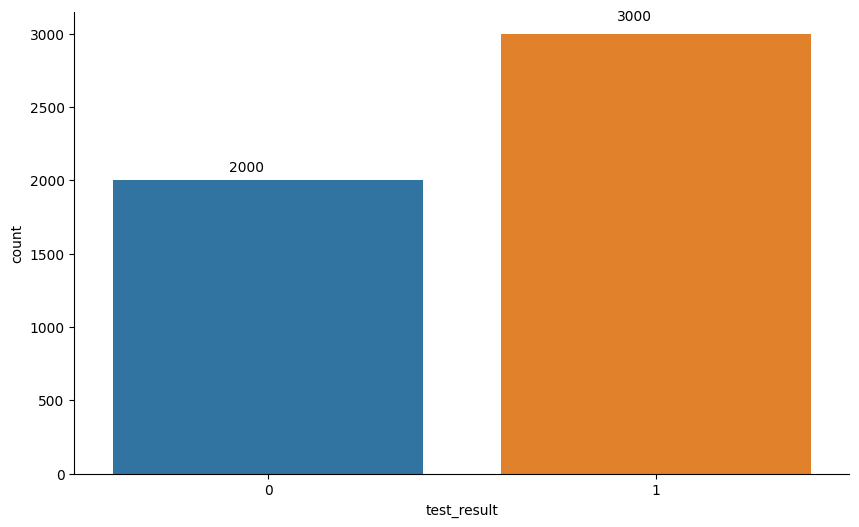

In [7]:
# target variable ın değerlerini countplot ile görselleştirelim

ax = sns.countplot(df['test_result'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [12]:
# age ve test_result arasındaki ilişkiyi boxplot ile görselleştirelim
import plotly.express as px

fig = px.box(df, x='test_result',y='age', points = "all")
fig.show()

yukarıdan anlaşılacağı üzere;

* yaklaşık 60  yas ortalaması ile ve yine yaklaşık 55/78 yaş aralığındaki kişiler testte başarısız olmaktadır 
* yaklaşık 45 yaş ortalaması ile yaklaşık 39/50 yaşa aralığındaki kişiler ise testte başarılı olmaktadır
* yaş ilerledikçe testte başarılı olma durumunun azaldığı ve her iki sonuç içinde outliers ların olduğunu

ilk izlenim olarak söyeleyebiliriz

In [14]:
# physical_score ve test_result arasındaki ilişkiyi boxplot ile görselleştirelim

fig = px.box(df, x='test_result',y='physical_score',points = "all")
fig.show()

yukarıdan anlaşılacağı üzere;

* physical_score değeri 20/30 aralığında olanların testte başarısız oldukları
* physical_score değeri 35/40 aralığında olanların testte başarılı oldukları
* physical_score değeri arttıkça başarılı olma durumunun arttığı ve her iki sonuç içinde outliers ların olduğu

ilk izlenim olarak söylenebilir

In [23]:
# age ve physical_score durumuna göre test_result sonuçlarını görselleştirelim  

fig = px.scatter(df, x='age', y='physical_score', color='test_result')
fig.show()

yukarıda features lara bağlı olarak target varaible ın aldığı değerler görülmektedir. 

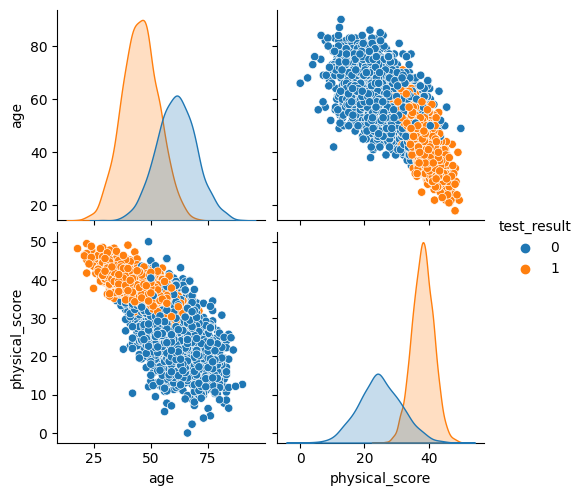

In [24]:
sns.pairplot(df,hue='test_result');

yukarıdaki grafikte sol üst yada sağ alt taki grafiklerde her iki dağılımın kesişimi ne kadar az olursa ROC AUC okadar yüksek çıkar.

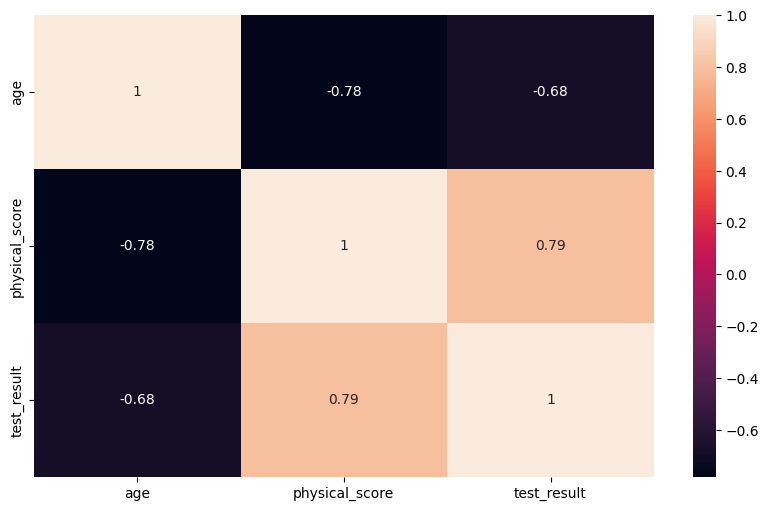

In [25]:
# heatmap ile korelasyon durumuna bakalım

sns.heatmap(df.corr(), annot=True);

In [28]:
fig = px.imshow(df.corr(), aspect="auto", text_auto = True)
fig.show()

yukarıdaki sonuçlara göre;

* test_result ile age arasında negatif yönlü orta şiddetli bir ilişki yani yaş arttıkça test_result 0 olur,
* test_result ile physical_score arasında pozitif yönlü güçlü bir ilişki yani physical_score arttıkça test_result 1 olur,
* age ile physical_score arasında ise negatif yönlü güçlü bir ilişki olduğu yani age arttıkça physical_score düşüyor diyebiliriiz.

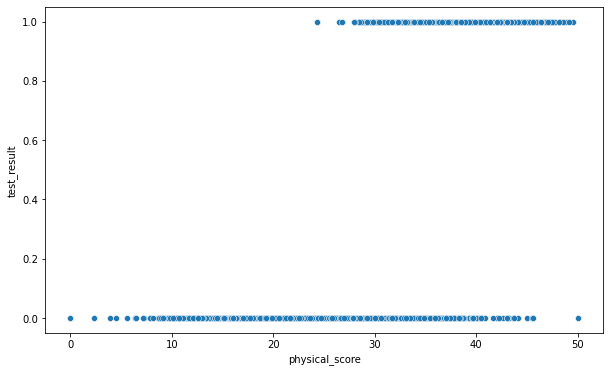

In [16]:
# target feature scatterplot ile görselleştirelim

sns.scatterplot(x='physical_score',y='test_result',data=df);  

yukarıdaki grafiğe göre;

* physical_score değeri yaklaşık 25 altında olanlar testte başarısız olmuş. 25 üzerinde olanlardan ise testte başarılı olanlar ve olamayanlar var

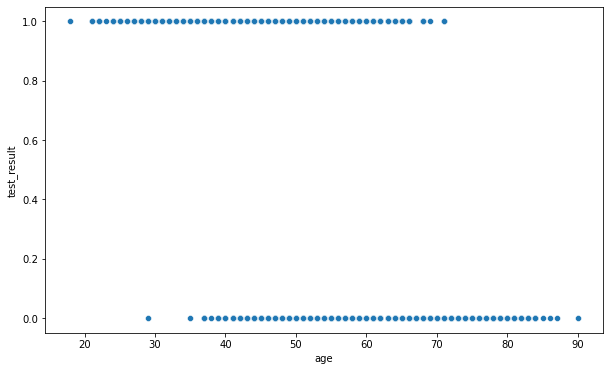

In [17]:
# target feature scatterplot ile görselleştirelim

sns.scatterplot(x='age',y='test_result',data=df);  

## Train | Test Split and Scaling

In [29]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # scale fit işlemi sadece X_train' e, transform ise X_train ve X_test'e uygulanır
X_test_scaled = scaler.transform(X_test)

## Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model = LogisticRegression()                       # model tanımlandı
log_model.fit(X_train_scaled, y_train)                 # fit işlemi 
print("katsayılar: ", log_model.coef_)                 # katsayılar
print("sabit: ", log_model.intercept_)

katsayılar:  [[-0.94953524  3.45991194]]
sabit:  [0.48867341]


In [35]:
y_pred = log_model.predict(X_test_scaled)   # X_test_scaled ile tahmin yapıyoruz
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [36]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

# modele göre yapılan tahmin de herbir observation için 0 ve 1 olma olasılığını gösterir. 
# sol taraf 0 olma olasılığı sağ taraf 1 olma olasılığı. olasılıklar toplamı 1 dir

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [38]:
test_data["pred_proba"] = y_pred_proba[:,1] # aldığımız tahminleri kıyaslayalım
test_data

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.976
2511 45.000          38.700            1       0.973
345  56.000          21.800            0       0.011
2521 40.000          44.000            1       0.998
54   64.000          25.400            0       0.025
...     ...             ...          ...         ...
4770 46.000          37.700            1       0.956
188  59.000          36.500            1       0.813
3335 54.000          22.800            0       0.019
4583 58.000          20.500            0       0.005
3208 48.000          24.700            0       0.069

[500 rows x 4 columns]

In [39]:
test_data["pred"] = y_pred
test_data

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.025     0
...     ...             ...          ...         ...   ...
4770 46.000          37.700            1       0.956     1
188  59.000          36.500            1       0.813     1
3335 54.000          22.800            0       0.019     0
4583 58.000          20.500            0       0.005     0
3208 48.000          24.700            0       0.069     0

[500 rows x 5 columns]

* 2371 index numaralı observation a bakarsak test_result yani gerçek değerimiz 0 olmasına rağmen yüksek olasılık değeri ile 1 tahmininde bulunmuş. başarılı tahminlerde gayet net bir şekilde görülüyor

## Model Performance on Classification Tasks

``score değerleri default olarak test_result 1 durumuna göredir``

In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [41]:
accuracy_score(y_test,y_pred)

0.93

In [42]:
log_model.score(X_test_scaled, y_test)     # accuracy_score u verir

0.93

In [43]:
precision_score(y_test, y_pred)

0.9331210191082803

In [44]:
recall_score(y_test, y_pred)

0.9543973941368078

In [45]:
f1_score(y_test, y_pred)

0.9436392914653785

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

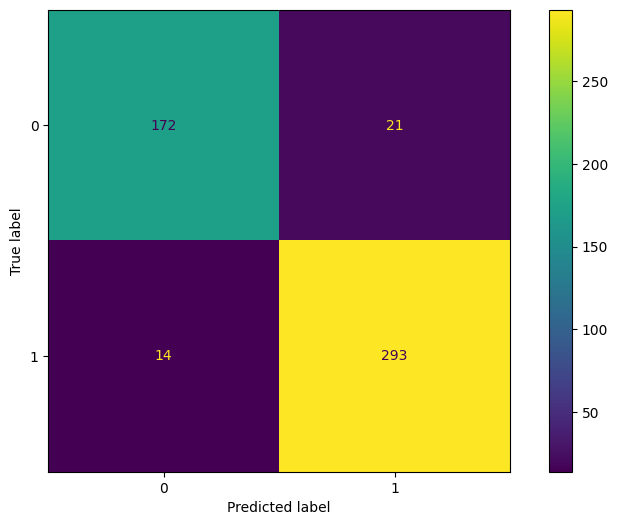

In [48]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

* TrueNegatif 172 : gerçekte testte başarısız, modelimiz testte başarısız olarak tahminde bulundu, negatifi doğru tahmin etti
* FalsePozitif 21 : gerçekte testte başarısız, modelimiz testte başarılı olarak tahminde bulundu, negatifi yanlış tahmin etti
* FalseNegatif 14 : gerçekte testte başarılı, modelimiz testte başarısız olarak tahminde bulundu, pozitifi yanlış tahmin etti
* TruePozitif 293 : gerçekte testte başarılı, modelimiz testte başarılı olarak tahminde bulundu, pozitifi doğru tahmin etti

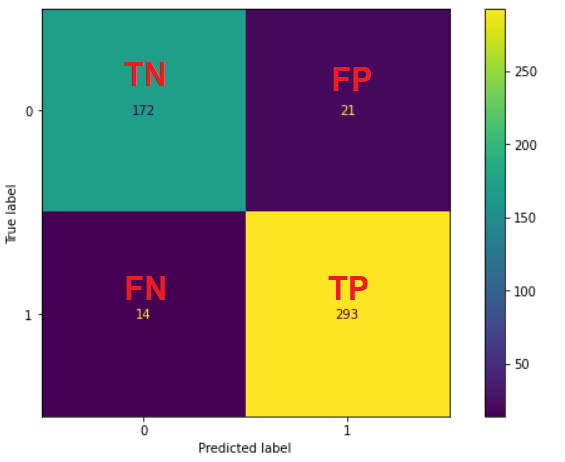

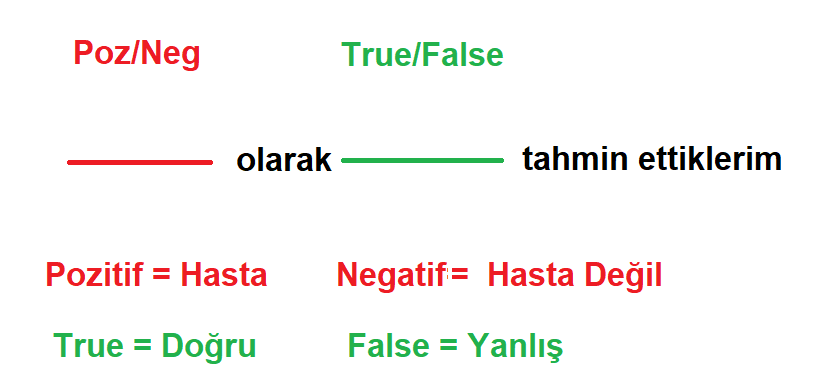

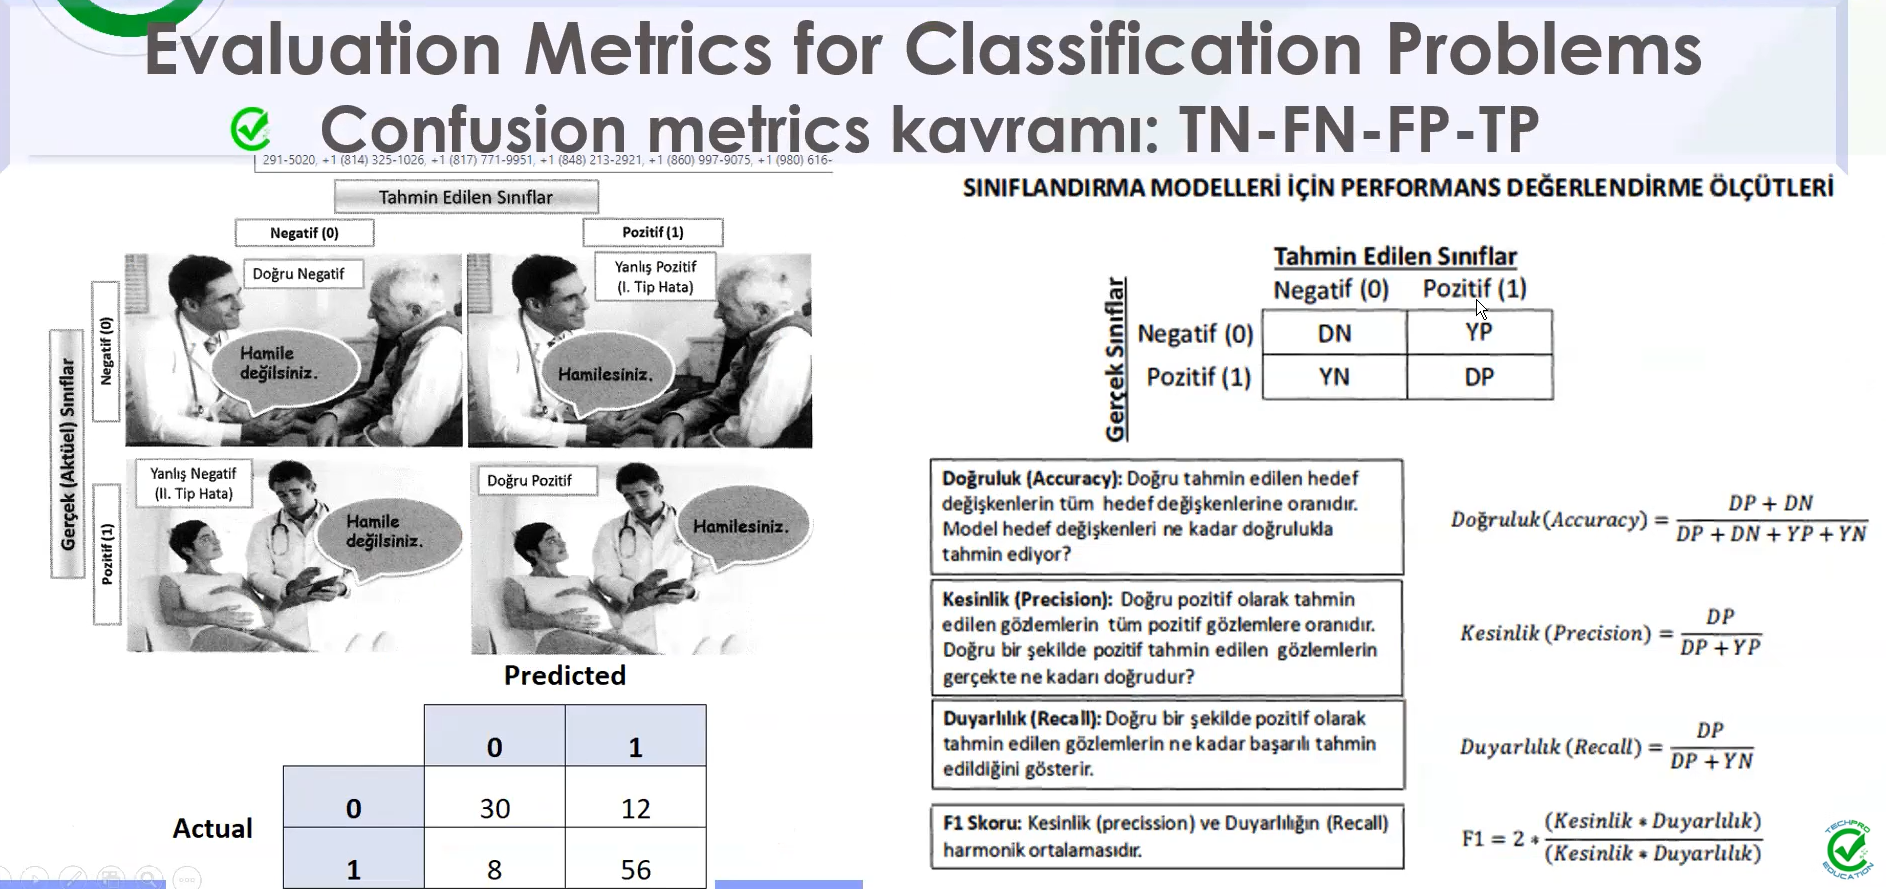

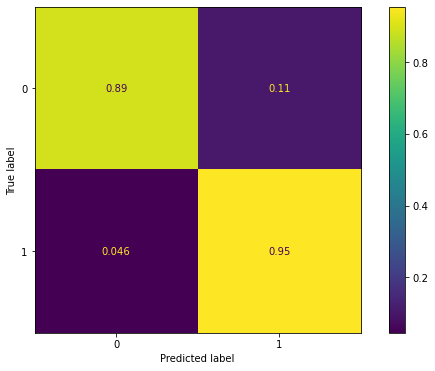

In [51]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

test_results yani gerçek değerler için soldan sağa yatay;

* modelimiz; test_results değeri 0 olanları % 89 oranında 0 olarak doğru tahmin etmiş, % 11 oranında 1 olarak yanlış tahmin etmiş
* modelimiz; test_results değeri 1 olanları % 95 oranında 1 olarak doğru tahmin etmiş, % 4,6 oranında 0 olarak yanlış tahmin etmiş

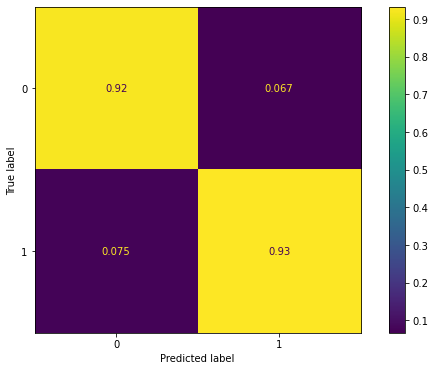

In [52]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

tahmin değerler için yukardan aşağı dikey ;

* modelimiz; % 92 oranında gerçek değeri 0 olanları 0 olarak doğru tahmin etmiş, % 7.5 oranında gerçek değeri 1 olanları 0 olarak yanlış tahmin etmiş
* modelimiz; % 93 oranında gerçek değeri 1 olanları 1 olarak doğru tahmin etmiş, % 6.7 oranında gerçek değeri 0 olanları 1 olarak yanlış tahmin etmiş

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



* ``Precision``, bir sınıfın tahmin edilen örneklerinin gerçekten o sınıfa ait olan örneklerin oranını gösterir. 

* ``Recall``, gerçek bir sınıfa ait tüm örneklerin tahmin edilen örneklerin oranını gösterir. 

* ``F1-score`` ise precision ve recall ölçütlerinin harmonik ortalamasını gösterir ve bir sınıfın performansını özetleyen en iyi ölçüttür.

* ``Accuracy``, doğru tahmin edilen örneklerin toplam örnek sayısına oranını gösterir. 

* ``Macro avg``, tüm sınıfların precision, recall ve f1-score ölçütlerinin ortalamasını alır ve her bir sınıfın performansını eşit olarak önemser. 

* ``Weighted avg`` ise her bir sınıfın örnek sayısına göre ağırlıklandırılmış bir ortalama alır ve ``dengesiz veri setleri için daha uygun`` bir ölçüttür.

* ``Support``, bir sınıfa ait toplam örnek sayısını gösterir. Yukarıdaki örnekte, "0" sınıfına ait 193 örnek, "1" sınıfına ait 307 örnek ve toplamda 500 örnek bulunmaktadır.

not: recall ve f1 score un artmasına yönelik çabamız olacak

örnek
* precision = 0.1, recall = 1 ve kanser olan hasta sayısı 100 ise nasıl yorum yapılır?

recall değerinin 1 olması gerçekte hasta olanların tamamının bilindiğini gösterir. precision değerinin 0.1 olması ise 100 hastayı bilmek için 1000 tahminde bulunduğumuzu gösterir. bu nedenle modelin başarısız olduğu söylenebilir.
score değerlerinin birbirine yakın olması iyidir

* <span style="color:green">precision düşük recall yüksekse model sallıyor demektir. tersi durumda ise model düzgün tahmin yapmıyor demektir. ikisi arasındaki uyum önemlidir</span>

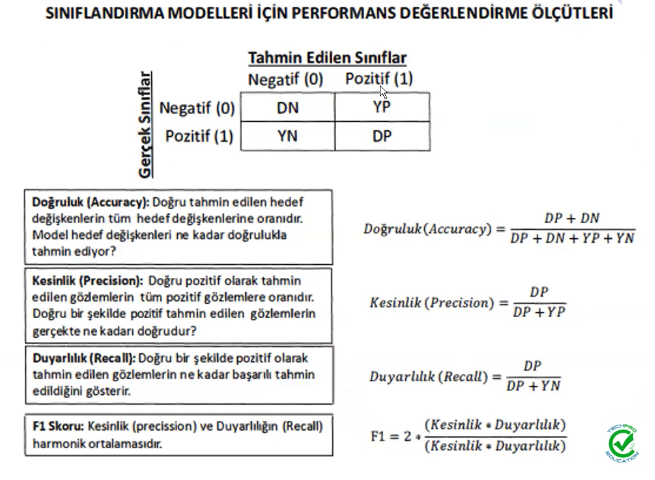

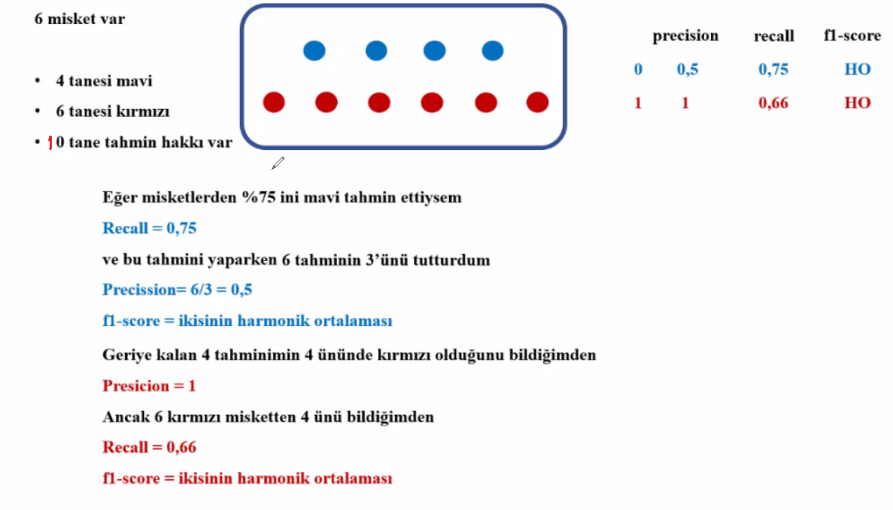

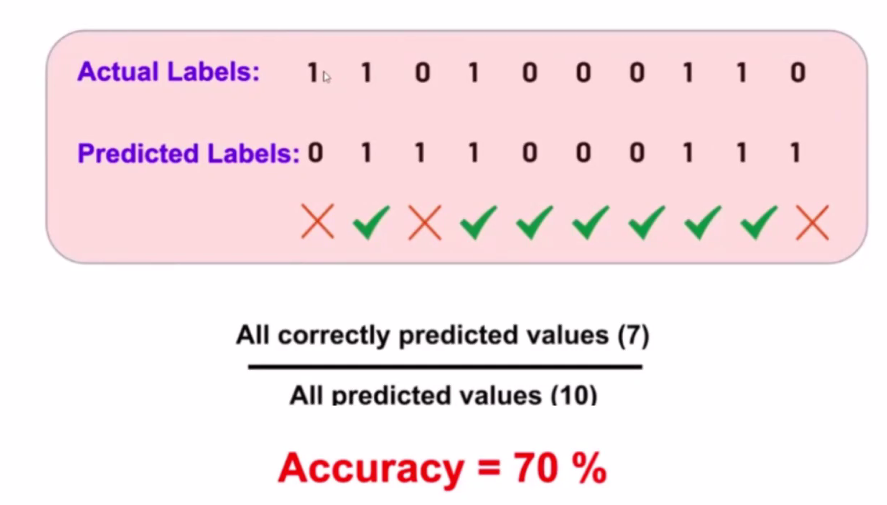

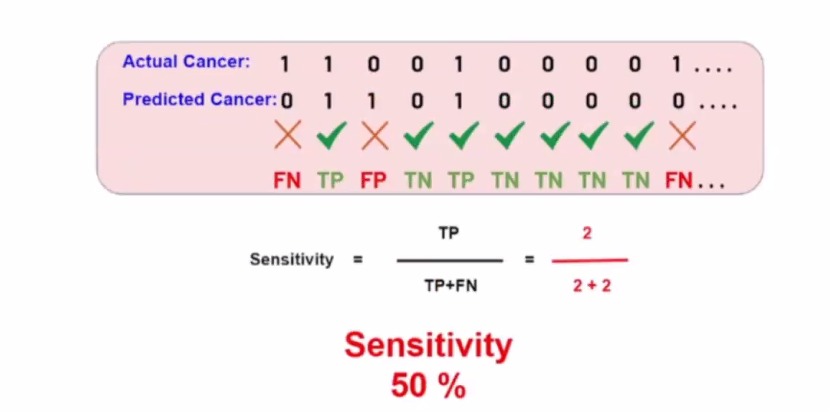

sensetive = recall

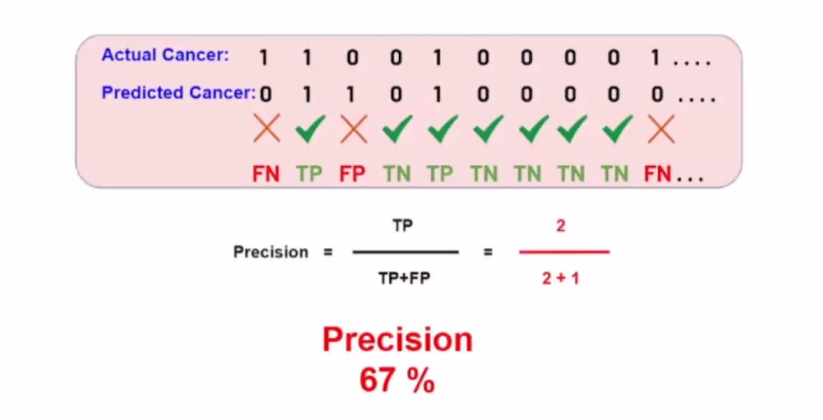

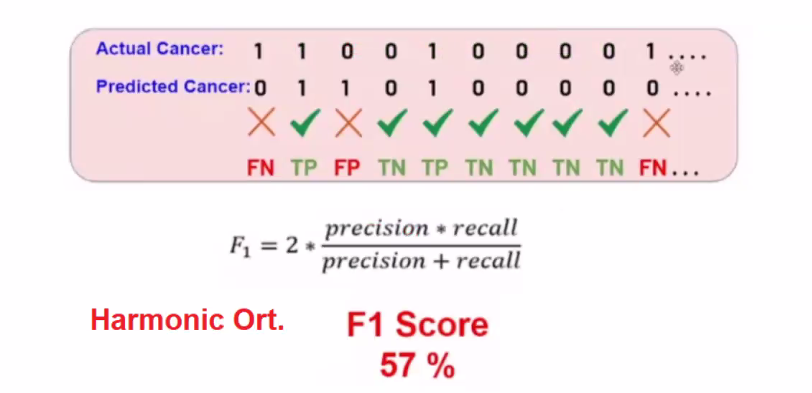

In [50]:
y_train_pred = log_model.predict(X_train_scaled)            # train set score larını buluyoruz
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



In [49]:
print(classification_report(y_test, y_pred))    

# yukarda test seti skorlarına bakmıştık buraya tekrar aldık. train set skorları ile karşılaştırıyoruz

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



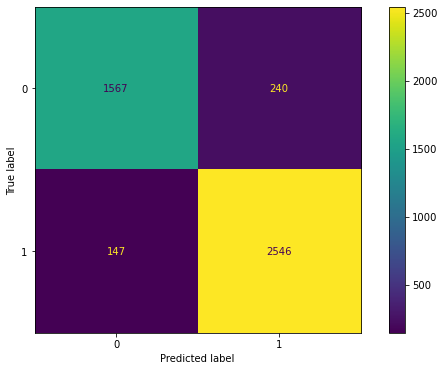

In [60]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

* TrueNegatif 1567 : gerçekte testte başarısız, modelimiz testte başarısız olarak tahminde bulundu, negatifi doğru tahmin etti
* FalsePozitif 240 : gerçekte testte başarısız, modelimiz testte başarılı olarak tahminde bulundu, negatifi yanlış tahmin etti
* FalseNegatif 147 : gerçekte testte başarılı, modelimiz testte başarısız olarak tahminde bulundu, pozitifi yanlış tahmin etti
* TruePozitif 2546 : gerçekte testte başarılı, modelimiz testte başarılı olarak tahminde bulundu, pozitifi doğru tahmin etti

## Cross Validate

In [51]:
from sklearn.model_selection import cross_validate

In [52]:
import sklearn                              # score ları buradaki gibi yazmazsak hata verir
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [53]:
model = LogisticRegression()                # modelimizi reset yapıyoruz ve seçiyoruz

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.010       0.005          0.900           0.889        0.952    0.919
2      0.010       0.003          0.924           0.921        0.956    0.938
3      0.005       0.003          0.936           0.917        0.981    0.948
4      0.007       0.004          0.931           0.938        0.948    0.943
5      0.008       0.005          0.938           0.941        0.955    0.948
6      0.007       0.004          0.902           0.934        0.900    0.917
7      0.006       0.002          0.898           0.889        0.948    0.917
8      0.006       0.005          0.911           0.896        0.963    0.928
9      0.005       0.003          0.891           0.910        0.907    0.909
10     0.007       0.003          0.916           0.911        0.952    0.931

In [59]:
# CV sonrası score lar
df_scores.mean()[2:]                        # test_result 1 class a göre sonuçları değerlendirir

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [54]:
# CV öncesi score lar
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



In [ ]:
# model performancını test edelim

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [56]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

* unbalance datalarda ROC yerine PRC (Precision Recall Curve) e bakılır

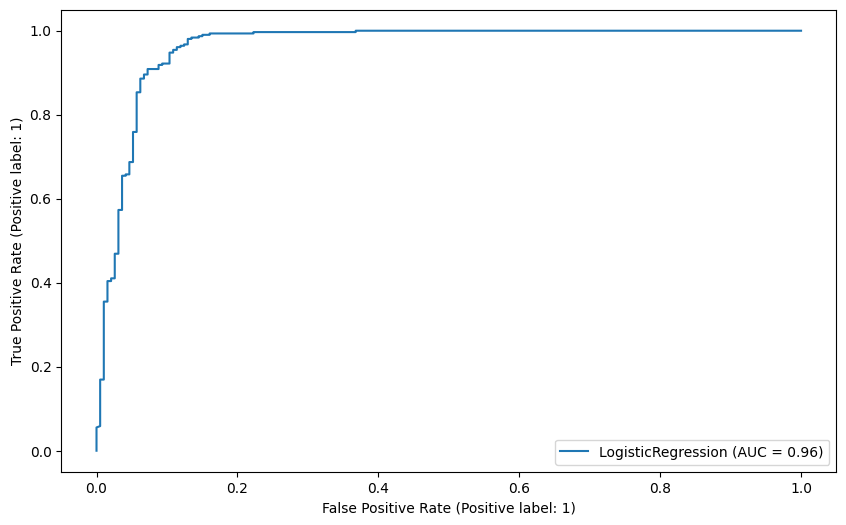

In [57]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [68]:
# roc grafiğinin scorunu direk görelim
roc_auc_score(y_test, y_pred_proba[:,1])        # y_pred_proba olması gerekir buna dikkat genelde kaçırılır

0.9630132824762451

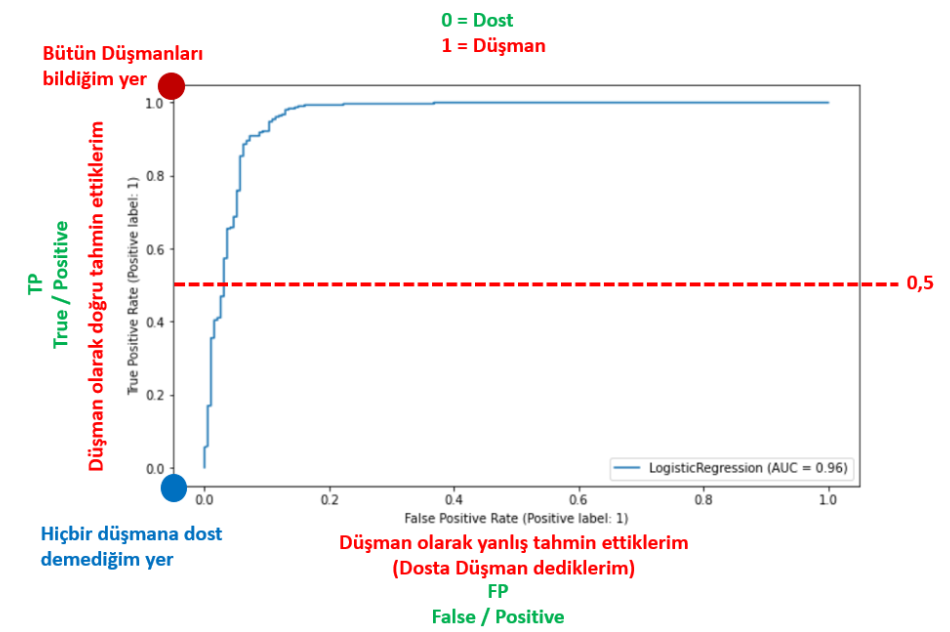

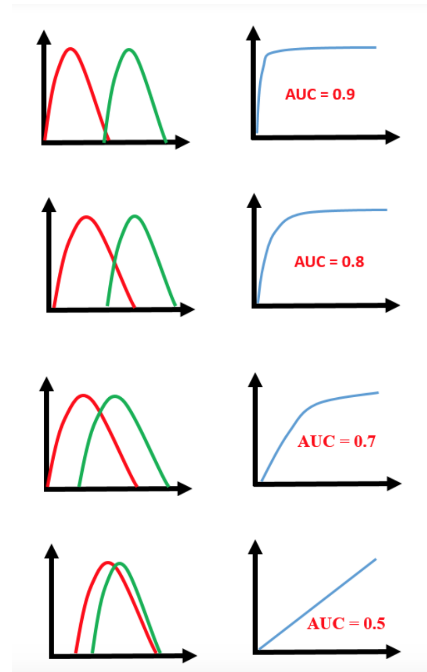

*soldaki grafiklerde kesişim ne kadar az olursa AUC okadar yüksek çıkar

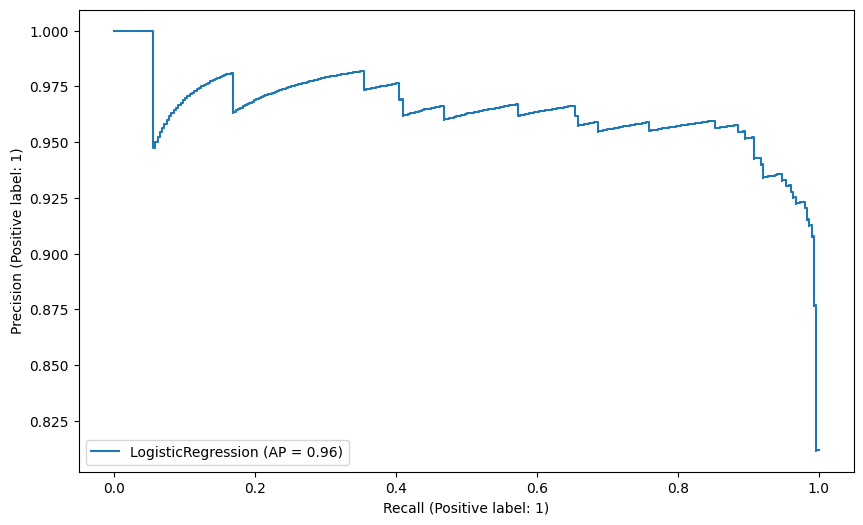

In [58]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [59]:
scaler = StandardScaler().fit(X)            # final modelde X in tamamı scale fit edilir

In [60]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb')) #  'wb' write binary : localde az yer kaplaması için binary olarak kaydediyoruz
X_scaled = scaler.transform(X)              # ilk pickle sonrası scale transform yapıyoruz.
final_model = LogisticRegression().fit(X_scaled, y)
pickle.dump(final_model, open("final_model_hearing", 'wb'))

İlk önce, scaler adlı bir veri ölçeklendirme işlemi yapmış ve sonucunda elde edilen objenin, "scaler_hearing" ismiyle pickle modülü kullanılarak binary olarak kaydedilmesi sağlanıyor. Böylece, ileride bu ölçeklendirme işleminin kullanılabileceği bir yerde bu binary dosyası yüklenebilir.

Daha sonra, scaler.transform(X) işlemiyle veriler ölçeklendiriliyor ve bu ölçeklendirilmiş veriler X_scaled değişkenine atanıyor.

Son olarak, ölçeklendirilmiş verileri ve etiketleri LogisticRegression() sınıfından bir model nesnesi oluşturularak eğitiliyor ve bu nesne "final_model_hearing" adıyla pickle modülü kullanılarak binary olarak kaydediliyor. Böylece, ileride bu eğitilmiş modelin kullanılabileceği bir yerde bu binary dosyası yüklenebilir.

In [ ]:
# burdan sonrası bize tahmin için bir df, csv yada dictionary olarak bir veri gelmesi durumunda tahmin için yapılır

In [61]:
my_dict = {"age": [20, 30, 40, 50, 60],                   
           "physical_score": [50, 30, 20, 10, 5]}

In [62]:
sample = pd.DataFrame(my_dict)          # modele test etmek için my_dict i df yapıyoruz         
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

In [63]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))    # 'rb' read binary

In [65]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [66]:
predictions = final_model.predict(sample_scaled)                     # final modele predict için scale edilen sample verilir
predictions_proba = final_model.predict_proba(sample_scaled)         # samplenin proba değerlerini alırız

In [67]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   20              50     1       1.000
1   30              30     1       0.730
2   40              20     0       0.016
3   50              10     0       0.000
4   60               5     0       0.000